# The "boost factor"

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import simpson

def nfw(r,rs,rhos):
    x = r/rs
    return rhos/x/(1+x)**2

We will do this with an NFW halo profile (as we use it for Coma), now the boost factor is the effect of sub-halos. These are smaller dark matter halos within a larger halo (big halos form by lots of small halos merging and some of them survive remaining as sub-halos, the rest become the smooth DM profile of the parent halo). 

For an NFW halo we find the distribution of sub-halos as follows (see arXiv:1610.02399)
\begin{equation}
    \rho_{\mathrm{sub}}(r) = \rho_{NFW}(r) \times \frac{4 x_v}{(1+x_v)^2} \; ,
\end{equation}
where $x_v = \frac{r}{r_{\mathrm{vir}}}$. This $r_{\mathrm{vir}}$ is the "virial radius" which is 2.7 Mpc for Coma. I will plot this distribution below

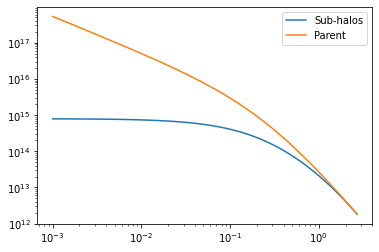

In [17]:
def sub_dist(r,rvir):
    x = r/rvir
    return 4*x/(1+x)**2
rvir = 2.7 #Mpc
rs = 2.7/9.4 #Mpc
rhos = 1.86e6*1e9 #Msol/Mpc^3
r = np.logspace(-3,np.log10(rvir),num=101)
plt.plot(r,nfw(r,rs,rhos)*sub_dist(r,rvir),label="Sub-halos")
plt.plot(r,nfw(r,rs,rhos),label="Parent")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

As we can see, the sub-halo distribution is much flatter at small radii, as we expect more sub-halos to survive at larger radii. At small radii they are ripped apart by tidal stripping. Sub-halos affect our gamma-ray flux because they are much dense than their parent halo and our flux scales with $\rho^2$. People have computed the full effect of this as increasing the flux by a factor of $\sim 60$ (see arXiv:1603.04057). We need to know how much of that boost we will get when integrating to $R = 0.89$ Mpc rather than the full virial radius. Thus, we can compute
\begin{equation}
\mathcal{B} = 60 \frac{\int_0^R d r r^2 \rho_{\mathrm{sub}}(r)}{\int_0^{r_{\mathrm{vir}}} d r r^2 \rho_{\mathrm{sub}}(r)} \; .
\end{equation}

In [18]:
rho_sub_full = nfw(r,rs,rhos)*sub_dist(r,rvir)
r_integ = np.logspace(-3,np.log10(0.89),num=101)
rho_sub_R = nfw(r_integ,rs,rhos)*sub_dist(r_integ,rvir)
print(f"Final boost factor: {60*simpson(r_integ**2*rho_sub_R,r_integ)/simpson(r**2*rho_sub_full,r)}")

Final boost factor: 17.77096750030117
